In [1]:
%matplotlib inline
import os

import pickle
import random
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [2]:
image_data = 'C:\\Users\\ISHIKA JAIN\\Downloads\\dataset\\HandGesture\\images'

In [3]:
categories = ['call_me','fingers_crossed','up','okay','paper','rock','rock_on','scissor','peace','thumbs']
data = []

for category in categories:
    path=os.path.join(image_data,category)
    label=categories.index(category)
    for img in os.listdir(path):
            imgpath=os.path.join(path,img)
            sign_img=cv2.imread(imgpath,0)
            try:
                sign_img=cv2.resize(sign_img,(50,50))
                image=np.array(sign_img).flatten()
                data.append([image,label])
            except Exception as e:
                pass

In [4]:
print(len(data))

5243


In [5]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [6]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [7]:
random.shuffle(data)
features=[]
labels=[]

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [8]:
xtrain, xtest, ytrain,ytest= train_test_split(features, labels, test_size = 0.3)

Accuracy is:  0.8766687857596949
Prediction is:  okay


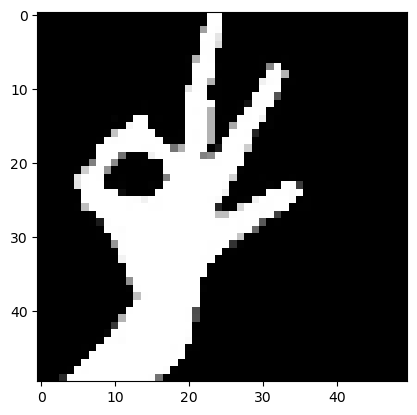

In [9]:
from sklearn.svm import SVC
model = SVC(C=1,kernel='poly',gamma= 'auto')
model.fit(xtrain, ytrain)
prediction=model.predict(xtest)

accuracy=model.score(xtest,ytest)

categories=['call_me','fingers_crossed','up','okay','paper','rock','rock_on','scissor','peace','thumbs']

print('Accuracy is: ', accuracy)
print('Prediction is: ', categories[prediction[0]])

mysign=xtest[0].reshape(50,50)
plt.imshow(mysign, cmap='gray')
plt.show()